In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [103]:
testSize = 0.25 #percentage of total set
k = 5 # for K-fold cross-validation
linear = LogisticRegression()
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
dummy =DummyClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
models = [#('Linear',linear,RFE(linear)),
          ('Gradient Boosting', GBC, SelectFromModel(GBC)),
          ('Random Forests',RFC,SelectFromModel(RFC)),
         ('Decision tree',DTC,SelectFromModel(DTC)),
         ('Adaboost',ABC,SelectFromModel(ABC))]

In [104]:
X = pd.read_csv("../binary/X.csv",header=None).values
y = pd.read_csv("../binary/y.csv",header=None,squeeze=True).values
waveLengths = pd.read_csv("../binary/Wavelength.csv",header=None)
X_toClassify = pd.read_csv("../binary/XToClassify.csv",header=None).values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
results = pd.DataFrame(columns=['Algorithm','mean score','total operation time','Number of important features',"mean score on reduced feature set","total operation timeon reduced feature set","Best feature"])
# print(results)
X_train.shape

(135, 921)

In [106]:
for name, model, selector in models:
    scores = cross_validate(model,X_train,y_train,cv=k,scoring='f1')
    selector.fit(X_train,y_train)
    X_reduced = selector.transform(X_train)
    scores_reduced = cross_validate(model,X_reduced,y_train,cv=k,scoring='f1')
    model.fit(X_train,y_train)
    results.loc[len(results)] = pd.Series({
        'Algorithm' : name,
        "mean score":scores['test_score'].mean(),
        "total operation time" : sum(scores['fit_time'])+sum(scores['score_time']),
        "Number of important features":sum(selector.get_support()),
        "mean score on reduced feature set":scores_reduced['test_score'].mean(),
        "total operation timeon reduced feature set" : sum(scores_reduced['fit_time'])+sum(scores_reduced['score_time']),
        "Best feature" : np.argmax(model.feature_importances_)
                                                                                                                                                    
    })
results

,Algorithm,mean score,total operation time,Number of important features,mean score on reduced feature set,total operation timeon reduced feature set,Best feature
0,Gradient Boosting,1.0,0.928805,72,1.000000,0.178585,220
1,Random Forests,1.0,0.074690,10,1.000000,0.066386,248
2,Decision tree,1.0,0.039284,1,1.000000,0.003990,634
3,Adaboost,1.0,0.045562,1,0.984593,0.009836,882


In [31]:
pd.DataFrame(NNC.predict(X_toClassify)).to_csv("../binary/PredictedClasses.csv",index=False)

In [49]:
print('total number of features: ', X.shape[1])


RFSelector = SelectFromModel(RF,'mean')
RF.fit(X_train,y_train)
RFSelector.fit(X_train,y_train)

# which features perform well enough to keep?
print(waveLengths[RFSelector.get_support()])


total number of features:  921
           0
199  495.126
264  519.073
281  525.310
293  529.705
382  562.129
632  651.467
670  664.811
874  735.317
880  737.361
882  738.042


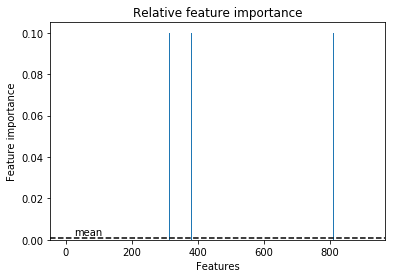

In [50]:
plt.bar(range(len(RF.feature_importances_)),RF.feature_importances_)
plt.axhline(y= RF.feature_importances_.mean(), hold=None, ls="dashed", color="black")
plt.text(x=25,y=RF.feature_importances_.mean()+0.001, s="mean", color="black")
plt.title("Relative feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.show()

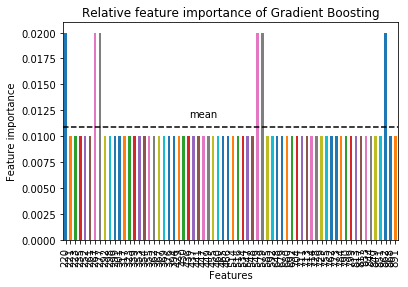

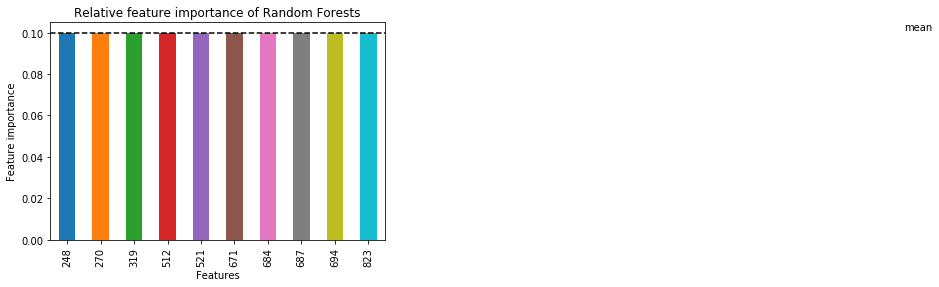

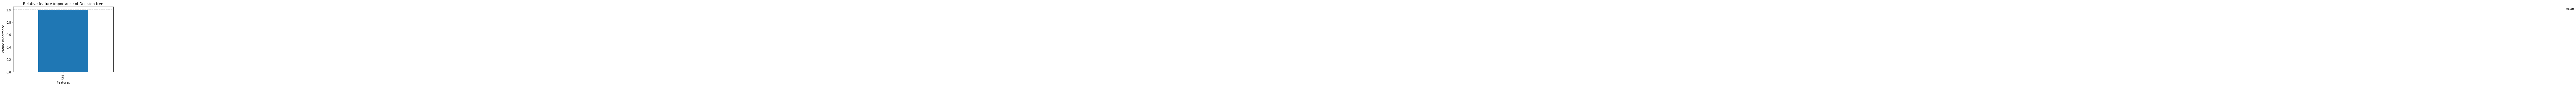

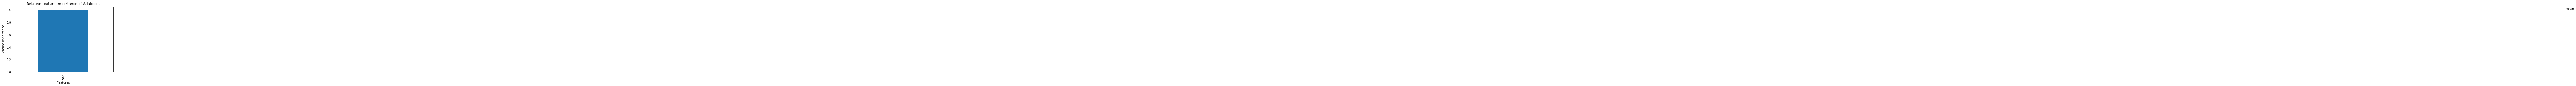

In [108]:
for name, model, selector in models:
    featImp = pd.Series(model.feature_importances_)
    feats = featImp[featImp>featImp.mean()]
    feats.plot(kind='bar')
    # plt.bar(feats.index,feats)
    plt.axhline(y= feats.mean(), hold=None, ls="dashed", color="black")
    plt.text(x=25,y=feats.mean()+0.001, s="mean", color="black")
    plt.title("Relative feature importance of " + name)
    plt.xlabel("Features")
    plt.ylabel("Feature importance")
    plt.show()

In [52]:

temp = np.partition(-RF.feature_importances_, 10)
result = -temp[:10]
print(result)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


In [67]:
feats

267    0.1
288    0.1
314    0.1
381    0.1
518    0.1
608    0.1
672    0.1
700    0.1
810    0.1
851    0.1
dtype: float64